# Pokémon Filtering & Sorting with Pandas


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Pokemon.csv")

In [8]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
print(df.shape)

(800, 13)


# **1.** How many Pokémon have an **Attack** greater than 150?


In [206]:
mask_q1 = df['Attack'] > 150
A1 = df.groupby(mask_q1)['Name'].count().loc[True]
A1

18

# **2.** Select all pokemon with a Speed of **10** or less


In [209]:
mask_q2 = df['Speed']<=10

A2 = df.groupby(mask_q2)['Name'].count().loc[True]
A2

5

# **3.** How many Pokémon have **Sp. Def** value of 25 or less?


In [219]:
mask_q3 = df['Sp. Def'] <= 25
A3 = (df.groupby(mask_q3)['Name'].count()).loc[True]
A3

18

# **4.** Select all **Legendary** Pokémon


In [220]:
A4 = df.loc[df['Legendary']]
A4['Name']

156               Articuno
157                 Zapdos
158                Moltres
162                 Mewtwo
163    MewtwoMega Mewtwo X
              ...         
795                Diancie
796    DiancieMega Diancie
797    HoopaHoopa Confined
798     HoopaHoopa Unbound
799              Volcanion
Name: Name, Length: 65, dtype: object

# **5.** Find the outlier: Pokémon with **high Defense** and **low Attack**


Text(150, 10, "Who's this guy?")

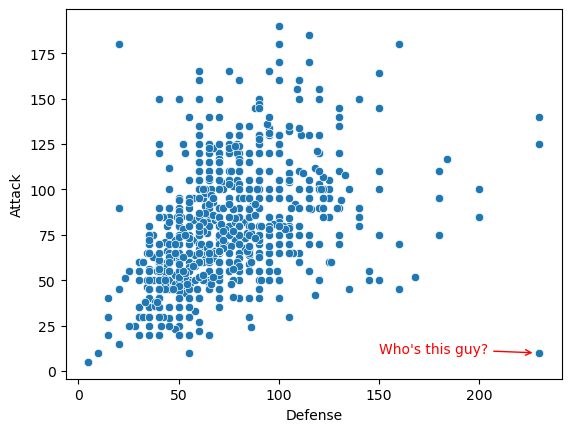

In [55]:
ax = sns. scatterplot(data=df, x="Defense", y="Attack")
ax. annotate(
    "Who's this guy?", xy=(228, 10), xytext=(150, 10), color='red', 
    arrowprops=dict (arrowstyle="->", color='red')
)    

In [62]:
A5 = df[(df['Attack']< 25) & (df['Defense']> 200)]
A5

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


# **6.** How many **Fire / Flying** Pokémon exist?


In [80]:
A6 = ((df['Type 1'] == 'Fire') & (df['Type 2'] == 'Flying')).sum()
A6

6

# **7.** How many Pokémon are **Poison‑type** in either slot?


In [79]:
A7 = ((df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')).sum()
A7

62

# **8.** Which **Type 1 = Ice** Pokémon has the **strongest Defense**?


In [92]:
A8 = df[df['Type 1'] == 'Ice'].nlargest(1, 'Defense')
A8

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


# **9.** What's the most common **Type 1** among **Legendary** Pokémon


In [104]:
A9 = df.loc[df['Legendary'], 'Type 1'].value_counts().head()
A9

Type 1
Psychic     14
Dragon      12
Fire         5
Electric     4
Water        4
Name: count, dtype: int64

# **10.** What's the most powerful **Water** Pokémon (by `Total`) in **Generations 1–3**


In [161]:
water_mask = (df['Type 1'] == 'Water') | (df['Type 2'] == 'Water')
gen123_mask = df['Generation'].isin([1,2,3])
A10 = (
    df
    .loc[water_mask & gen123_mask]
    .sort_values('Total', ascending = False)
    .head(1)
)
A10['Name']

422    KyogrePrimal Kyogre
Name: Name, dtype: object

# **11.** What's the most powerful **Dragon** from **Generations 5–6**


In [166]:
dragon_mask = (df['Type 1'] == 'Dragon') | (df['Type 2'] == 'Dragon')
gen56_mask = df['Generation'].isin([5,6])
A11 = df[dragon_mask & gen56_mask].sort_values('Total', ascending = False).head(1)
A11['Name']

711    KyuremBlack Kyurem
Name: Name, dtype: object

# **12.** Select all **Fire**‐type Pokémon with **Attack > 100**


In [174]:
fire_mask = (df['Type 1'] == "Fire") |(df['Type 2'] == 'Fire')
attplus100_mask = df['Attack'] > 100
A12 = df[fire_mask & attplus100_mask]
A12[['Name','Attack']]

,Name,Attack
7,CharizardMega Charizard X,130
8,CharizardMega Charizard Y,104
64,Arcanine,110
147,Flareon,130
263,Entei,115
270,Ho-oh,130
278,Blaziken,120
279,BlazikenMega Blaziken,160
354,CameruptMega Camerupt,120
424,GroudonPrimal Groudon,180


# **13.** Select all Pokémon that are **both Water and Flying** types


In [178]:
A13 = df.loc[((df['Type 1'] == 'Water') & (df['Type 2'] == 'Flying'))|((df['Type 1'] == 'Flying') & (df['Type 2'] == 'Water'))]
A13[['Name','Type 1','Type 2']]

,Name,Type 1,Type 2
140,Gyarados,Water,Flying
244,Mantine,Water,Flying
301,Wingull,Water,Flying
302,Pelipper,Water,Flying
508,Mantyke,Water,Flying
641,Ducklett,Water,Flying
642,Swanna,Water,Flying


# **14.** Select the specifique coloms for Legenday Fire Pokémon (select Name, HP, Attack, Speed)


In [180]:
A14 = (df[(df['Legendary'] == True) & (df['Type 1'] == 'Fire') | (df['Type 2'] == 'Fire')])
A14[['Name', 'HP','Attack','Speed']]

,Name,HP,Attack,Speed
158,Moltres,90,100,90
246,Houndour,45,60,65
247,Houndoom,75,90,95
248,HoundoomMega Houndoom,75,90,115
263,Entei,115,115,100
270,Ho-oh,106,130,90
424,GroudonPrimal Groudon,100,180,90
532,RotomHeat Rotom,50,65,86
542,Heatran,91,90,77
553,Victini,100,100,100


# **15.** Select the Slowest and Fastest **5 %** of Pokémon by **Speed**


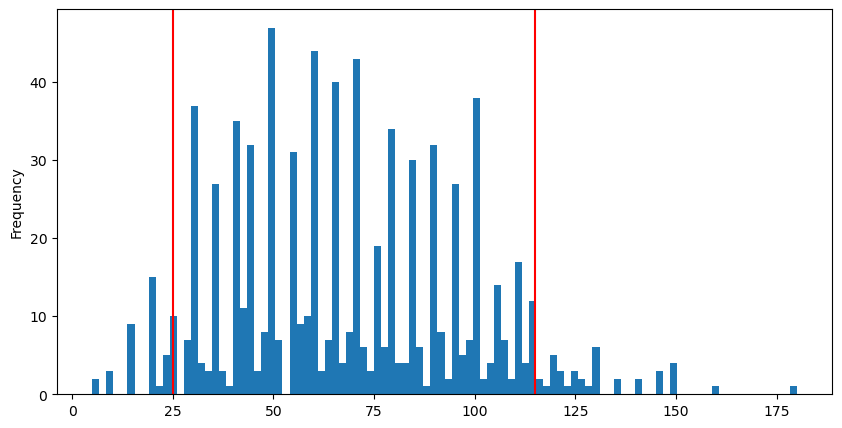

In [187]:
ax = df ['Speed'].plot (kind='hist', figsize=(10, 5), bins=100)
ax.axvline(df['Speed'].quantile(.05), color='red')
ax.axvline(df['Speed'].quantile(.95), color='red')

In [188]:
quantile_5 = df['Speed'].quantile(0.05)
quantile_95 = df['Speed'].quantile(0.95)
slowest_5_df = df[df['Speed'] <= quantile_5]
fastest_5_df = df[df['Speed'] >= quantile_95]
print('Slowest set:', slowest_5_df[['Name','Speed']].head())
print('Fastest set:', fastest_5_df[['Name','Speed']].head())

Slowest set:           Name  Speed
44  Jigglypuff     20
51       Paras     25
80     Geodude     20
85    Slowpoke     15
95      Grimer     25
Fastest set:                      Name  Speed
19  BeedrillMega Beedrill    145
23    PidgeotMega Pidgeot    121
56                Dugtrio    120
58                Persian    115
70               Alakazam    120


# **16.** Find the Ultra‑Powerful Legendary Pokémon (highest `Total` overall)


In [203]:
A16 = df[df['Legendary']].loc[df['Total'].idxmax()]
A16[['Name','Total']]

Name     MewtwoMega Mewtwo X
Total                    780
Name: 163, dtype: object